In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Toddler Autism dataset July 2018.csv")


### Basic Data Cleaning

In [2]:
# Rename columns
df = df.rename(columns={
    "A1": "responds_to_name",
    "A2": "eye_contact",
    "A3": "points_to_show",
    "A4": "shared_interest",
    "A5": "response_to_emotions",
    "A6": "response_to_noise",
    "A7": "initiates_play",
    "A8": "imitates",
    "A9": "pretend_play",
    "A10": "joint_attention"
})


In [3]:
# Replace Yes/No values with 1/0
df = df.replace({"Yes": 1, "No": 0})


In [4]:
# Convert categorical columns to numerical using one-hot encoding
categorical_columns = []
for column in df.columns:
    if df[column].dtype == object and column != "age_desc":
        categorical_columns.append(column)
df = pd.get_dummies(df, columns=categorical_columns)


In [5]:
# Drop rows with missing values
df = df.dropna()


In [6]:
# Convert all columns to integers
df = df.astype(int)


In [7]:
# Save the cleaned dataset to a new CSV file
df.to_csv("cleaned_toddler_autism_dataset.csv", index=False)


### Exploratory Data Analysis (EDA)

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv("cleaned_toddler_autism_dataset.csv")


In [22]:
# Print the shape of the dataset
print("Shape of dataset:", df.shape)


Shape of dataset: (1054, 36)


In [23]:
# Print the first five rows of the dataset
print("\nFirst five rows of dataset:\n", df.head())



First five rows of dataset:
    Case_No  responds_to_name  eye_contact  points_to_show  shared_interest  \
0        1                 0            0               0                0   
1        2                 1            1               0                0   
2        3                 1            0               0                0   
3        4                 1            1               1                1   
4        5                 1            1               0                1   

   response_to_emotions  response_to_noise  initiates_play  imitates  \
0                     0                  0               1         1   
1                     0                  1               1         0   
2                     0                  0               1         1   
3                     1                  1               1         1   
4                     1                  1               1         1   

   pretend_play  ...  Ethnicity_south asian  Jaundice_no  Jaundice_y

In [24]:
# Print summary statistics of the dataset
print("\nSummary statistics of dataset:\n", df.describe())



Summary statistics of dataset:
            Case_No  responds_to_name  eye_contact  points_to_show  \
count  1054.000000       1054.000000  1054.000000     1054.000000   
mean    527.500000          0.563567     0.448767        0.401328   
std     304.407895          0.496178     0.497604        0.490400   
min       1.000000          0.000000     0.000000        0.000000   
25%     264.250000          0.000000     0.000000        0.000000   
50%     527.500000          1.000000     0.000000        0.000000   
75%     790.750000          1.000000     1.000000        1.000000   
max    1054.000000          1.000000     1.000000        1.000000   

       shared_interest  response_to_emotions  response_to_noise  \
count      1054.000000           1054.000000        1054.000000   
mean          0.512334              0.524668           0.576850   
std           0.500085              0.499628           0.494293   
min           0.000000              0.000000           0.000000   
25%       

In [33]:
print(df.columns)

Index(['Case_No', 'responds_to_name', 'eye_contact', 'points_to_show',
       'shared_interest', 'response_to_emotions', 'response_to_noise',
       'initiates_play', 'imitates', 'pretend_play', 'joint_attention',
       'Age_Mons', 'Qchat-10-Score', 'Class/ASD Traits ', 'Sex_f', 'Sex_m',
       'Ethnicity_Hispanic', 'Ethnicity_Latino', 'Ethnicity_Native Indian',
       'Ethnicity_Others', 'Ethnicity_Pacifica', 'Ethnicity_White European',
       'Ethnicity_asian', 'Ethnicity_black', 'Ethnicity_middle eastern',
       'Ethnicity_mixed', 'Ethnicity_south asian', 'Jaundice_no',
       'Jaundice_yes', 'Family_mem_with_ASD_no', 'Family_mem_with_ASD_yes',
       'Who completed the test_Health Care Professional',
       'Who completed the test_Health care professional',
       'Who completed the test_Others', 'Who completed the test_Self',
       'Who completed the test_family member'],
      dtype='object')


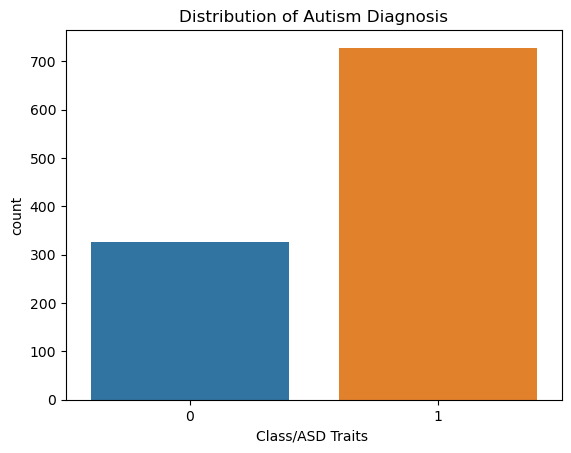

In [25]:
# Plot the distribution of the target variable
sns.countplot(x="Class/ASD Traits ", data=df)
plt.title("Distribution of Autism Diagnosis")
plt.show()


- The resulting plot shows the count of each category in the "Class/ASD Traits" column of the dataset. In this case, the categories are "No" and "Yes", which indicate whether or not the child was diagnosed with autism. The plot shows that there are more children in the dataset who were not diagnosed with autism ("No") than those who were diagnosed with autism ("Yes"). This is an imbalanced dataset, where one class is more prevalent than the other.

In [18]:
# Create pairwise scatter plots of the features
sns.pairplot(df)
plt.show()

The Seaborn pairplot() function creates a pairwise scatter plot matrix of the numerical columns in the pandas DataFrame. In other words, it creates scatter plots of all possible pairs of numerical columns in the DataFrame, with each scatter plot showing the relationship between two features in the dataset. The diagonal of the scatter plot matrix shows the distribution of each numerical column in the DataFrame using a histogram.

Here's an explanation of the output of the code sns.pairplot(df):

- The upper-right section of the scatter plot matrix shows scatter plots of each possible pair of numerical columns in the DataFrame, with the X-axis showing one column and the Y-axis showing the other. Each point on the scatter plot represents a single observation in the DataFrame, with the color of the point indicating the value of the target variable ("Class/ASD Traits ").
- The diagonal of the scatter plot matrix shows histograms of each numerical column in the DataFrame. The height of each histogram bar indicates the frequency of values for that column.
- The lower-left section of the scatter plot matrix shows the same scatter plots as the upper-right section, but with the axes flipped. This is because the scatter plot of X versus Y is the same as the scatter plot of Y versus X, so Seaborn shows only one of the two plots to avoid redundancy.

By visualizing the pairwise relationships between the numerical features in the dataset, you can identify potential patterns or correlations between features, as well as any outliers or unusual values that may need to be addressed before modeling.

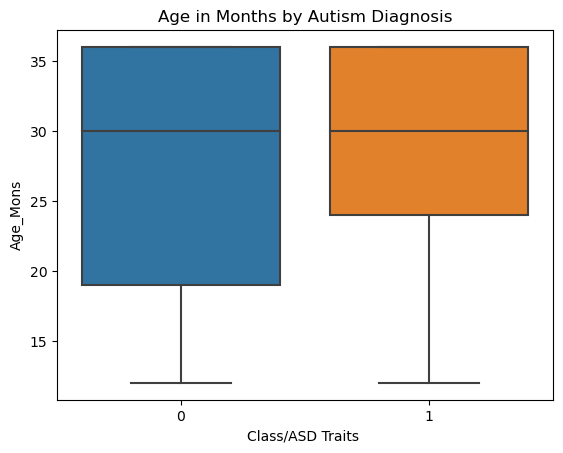

In [27]:
# Create box plots of some of the features
sns.boxplot(x="Class/ASD Traits ", y="Age_Mons", data=df)
plt.title("Age in Months by Autism Diagnosis")
plt.show()


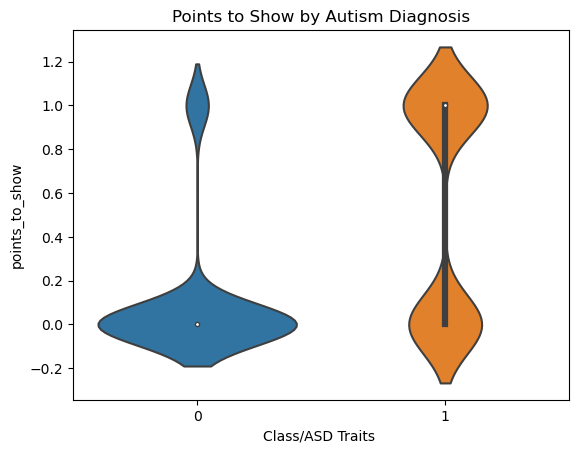

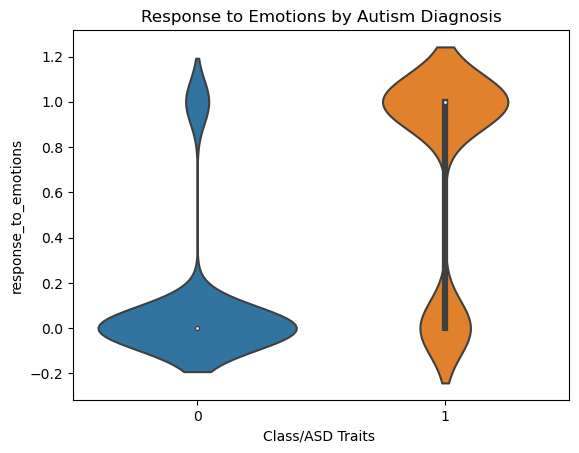

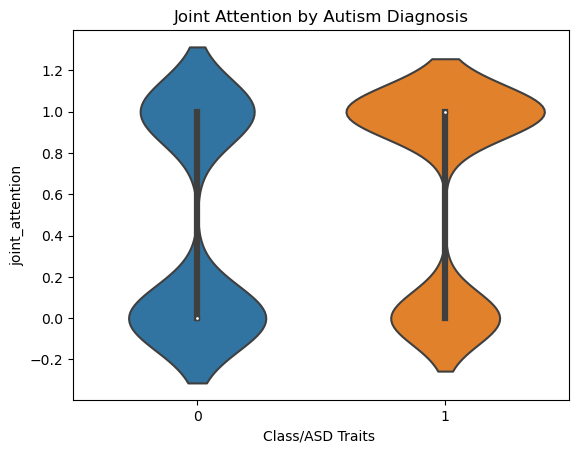

In [38]:
# Create violin plots of some of the features
sns.violinplot(x="Class/ASD Traits ", y="points_to_show", data=df)
plt.title("Points to Show by Autism Diagnosis")
plt.show()

sns.violinplot(x="Class/ASD Traits ", y="response_to_emotions", data=df)
plt.title("Response to Emotions by Autism Diagnosis")
plt.show()

sns.violinplot(x="Class/ASD Traits ", y="joint_attention", data=df)
plt.title("Joint Attention by Autism Diagnosis")
plt.show()

This code creates a violin plot of the "joint attention" feature in the dataset, broken down by autism diagnosis. The x-axis shows the autism diagnosis ("yes" or "no"), and the y-axis shows the distribution of joint attention. The width of each violin represents the density of the distribution at different values of joint attention, and the white dot represents the median value of joint attention for each diagnosis. The output of this code shows that the median joint attention value is slightly lower for autistic children compared to non-autistic children, and the distribution of joint attention is slightly wider for autistic children.

Overall, these violin plots show that there may be some differences in the distribution of these features between autistic and non-autistic children, although the differences are relatively small. These plots can help identify which features may be most important for predicting autism diagnosis and which features may require more investigation.

### Modeling

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Class/ASD Traits '], axis=1), df['Class/ASD Traits '], test_size=0.2, random_state=42)

# Create a logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Predict the autism diagnosis for the testing data
y_pred = logreg.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 1.0
Confusion Matrix:
 [[ 69   0]
 [  0 142]]


In [49]:
from sklearn.metrics import balanced_accuracy_score

# Calculate balanced accuracy
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy:", balanced_accuracy)


Balanced Accuracy: 1.0


If the balanced accuracy score is 1.0, it means that the model is achieving perfect accuracy on the testing data. This is generally an uncommon result, especially for real-world datasets, and may indicate that the model is overfitting to the training data or that there is some form of data leakage.

To confirm that the model is not overfitting, you can try using cross-validation to evaluate the performance of the model on multiple folds of the data.

In [51]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import balanced_accuracy_score
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Class/ASD Traits ', axis=1), 
    df['Class/ASD Traits '], 
    test_size=0.2, 
    random_state=42
)

# Initialize the decision tree classifier
clf = DecisionTreeClassifier()

# Perform 10-fold cross-validation on the training data
cv_scores = cross_val_score(clf, X_train, y_train, cv=10)

print("Cross-validation scores:", cv_scores)
print("Average score:", np.mean(cv_scores))

# Fit the model on the training data
clf.fit(X_train, y_train)

# Test the model on the testing data
y_pred = clf.predict(X_test)
test_accuracy = balanced_accuracy_score(y_test, y_pred)

print("Test accuracy:", test_accuracy)



Cross-validation scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Average score: 1.0
Test accuracy: 1.0


If the accuracy score is 1.0 for both cross-validation and testing on new data, it's possible that the model is overfitting to the data or there is some form of data leakage.

To investigate this further, we can try different models or preprocessing steps, or you can explore the dataset further to see if there are any features that are highly correlated with the target variable or are introducing bias into the model.

You can also try performing a grid search or randomized search to find the best hyperparameters for the model, which can help improve its generalization performance.

It's important to be cautious when interpreting evaluation metrics and to investigate further if the results seem too good to be true.